<a href="https://colab.research.google.com/github/leegaon0622/Bigdata/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_13%EC%A3%BC%EC%B0%A8_1_word_test_1119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

과제) 네이버 뉴스에서 본인이 선택한 검색어로 검색 한 결과를 json으로 저장 한 후    
1) 적절하지 않은 단어를 제거 한 후   
2) 단어 빈도수 기준으로 histogram 생성  
3) word cloud 생성.   

아래 code를 변형 하여 사용.   
가능 하면 본인의 client id와 client secret 사용 할 것. 2주차 과제에 업로드 된 code확인


In [ ]:
import os
import sys
import urllib.request
import datetime
import time
import json

#client_id = '9DJjN_UoiVw9xsNrcWAG'
#client_secret = '6qEKmlidPH'

client_id = '9DJjN_UoiVw9xsNrcWAG'
client_secret = '6qEKmlidPH'



#[CODE 1]
def getRequestUrl(url):
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)

    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

#[CODE 2]
def getNaverSearch(node, srcText, start, display):
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)

    url = base + node + parameters
    responseDecode = getRequestUrl(url)   #[CODE 1]

    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

#[CODE 3]
def getPostData(post, jsonResult, cnt):
    title = post['title']
    description = post['description']
    org_link = post['originallink']
    link = post['link']

    pDate = datetime.datetime.strptime(post['pubDate'],  '%a, %d %b %Y %H:%M:%S +0900')
    pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')

    jsonResult.append({'cnt':cnt, 'title':title, 'description': description,
'org_link':org_link,   'link': org_link,   'pDate':pDate})
    return

#[CODE 0]
def main():
    node = 'news'   # 크롤링 할 대상
    srcText = input('검색어를 입력하세요: ')
    cnt = 0
    jsonResult = []

    jsonResponse = getNaverSearch(node, srcText, 1, 100)  #[CODE 2]
    total = jsonResponse['total']

    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):
        for post in jsonResponse['items']:
            cnt += 1
            getPostData(post, jsonResult, cnt)  #[CODE 3]

        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = getNaverSearch(node, srcText, start, 100)  #[CODE 2]

    print('전체 검색 : %d 건' %total)

    with open('%s_naver_%s.json' % (srcText, node), 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)

        outfile.write(jsonFile)

    print("가져온 데이터 : %d 건" %(cnt))
    print ('%s_naver_%s.json SAVED' % (srcText, node))

if __name__ == '__main__':
    main()


검색어를 입력하세요: 월드컵
[2022-11-21 05:20:47.585518] Url Request Success
[2022-11-21 05:20:48.912067] Url Request Success
[2022-11-21 05:20:50.252818] Url Request Success
[2022-11-21 05:20:51.593076] Url Request Success
[2022-11-21 05:20:52.943094] Url Request Success
[2022-11-21 05:20:54.292633] Url Request Success
[2022-11-21 05:20:55.675096] Url Request Success
[2022-11-21 05:20:57.019363] Url Request Success
[2022-11-21 05:20:58.394418] Url Request Success
[2022-11-21 05:20:59.767178] Url Request Success
HTTP Error 400: Bad Request
[2022-11-21 05:21:00.764732] Error for URL : https://openapi.naver.com/v1/search/news.json?query=%EC%9B%94%EB%93%9C%EC%BB%B5&start=1001&display=100
전체 검색 : 2662631 건
가져온 데이터 : 1000 건
월드컵_naver_news.json SAVED


In [ ]:
#  폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
#런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
#  폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://security.ubuntu.com/ubuntu 

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


# 8장. 텍스트빈도분석 - 2) 한글 단어 분석

## 한글 단어 분석을 위한 패키지 준비

In [ ]:
import json
import re

from konlpy.tag import Okt

from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

# 1. 데이터 준비

### 1-1. 파일 읽기

In [ ]:
inputFileName = '/content/월드컵_naver_news'
data = json.loads(open(inputFileName+'.json', 'r', encoding='utf-8').read())
data #출력하여 내용 확인

[{'cnt': 1,
  'description': '바로 우리나라 가수의 빌보드 핫100 1위, 한국 영화의 아카데미 시상식 작품상 수상, <b>월드컵</b> 4강 진출 등 꿈꾸는 것마다 예언을 방불케한 것. 하지만 ”물이 나오는 영화는 후루룩 말아먹는다“라며 영화 ‘타이타닉’... ',
  'link': 'http://www.sportsworldi.com/newsView/20221121509551',
  'org_link': 'http://www.sportsworldi.com/newsView/20221121509551',
  'pDate': '2022-11-21 14:19:00',
  'title': '‘재벌집 막내아들’ 강기둥, 서태지 싱크로율 100% ‘눈길’'},
 {'cnt': 2,
  'description': '카타르 <b>월드컵</b>&apos; 개막식 현장으로 가는 길에서 만난 이집트 출신의 메나 기자는 박지성(41) SBS 해설위원을 떠올렸다. 모하메드 살라(리버풀)가 이끄는 이집트는 이번 <b>월드컵</b> 최종예선 문턱을 넘지 못하고 아쉽게 탈락했다.... ',
  'link': 'http://www.stnsports.co.kr/news/articleView.html?idxno=156642',
  'org_link': 'http://www.stnsports.co.kr/news/articleView.html?idxno=156642',
  'pDate': '2022-11-21 14:18:00',
  'title': '[라이브(La&apos;eeb) 도하] &quot;박지성+손흥민 조합이었다면 무조건 16강&quot;'},
 {'cnt': 3,
  'description': '금색에 녹색 테두리, 사람 두 명이 지구를 떠받치고 있는 디자인으로 대중에게 익숙한 <b>월드컵</b> 우승... 1970년 멕시코 <b>월드컵</b>에서 브라질이 통산 3회 우승을 달성하면서 그 대회까지 우승 트로피로 쓰인 줄리메컵을... ',
  'link': 'ht

### 1-2. 분석할 데이터 추출

In [ ]:
message = ''

for item in data:
#    if 'message' in item.keys():
#        message = message + re.sub(r'[^\w]', ' ', item['message']) +''
    if 'description' in item.keys():
        message = message + re.sub(r'[^\w]', ' ', item['description']) +''

message #출력하여 내용 확인

'바로 우리나라 가수의 빌보드 핫100 1위  한국 영화의 아카데미 시상식 작품상 수상   b 월드컵  b  4강 진출 등 꿈꾸는 것마다 예언을 방불케한 것  하지만  물이 나오는 영화는 후루룩 말아먹는다 라며 영화  타이타닉     카타르  b 월드컵  b  apos  개막식 현장으로 가는 길에서 만난 이집트 출신의 메나 기자는 박지성 41  SBS 해설위원을 떠올렸다  모하메드 살라 리버풀 가 이끄는 이집트는 이번  b 월드컵  b  최종예선 문턱을 넘지 못하고 아쉽게 탈락했다     금색에 녹색 테두리  사람 두 명이 지구를 떠받치고 있는 디자인으로 대중에게 익숙한  b 월드컵  b  우승    1970년 멕시코  b 월드컵  b 에서 브라질이 통산 3회 우승을 달성하면서 그 대회까지 우승 트로피로 쓰인 줄리메컵을    H조 컨디션 끌어올리기 박차 2022 카타르  b 월드컵  b 이 개막하며 오랫동안 계속됐던  준비의 시간 이 끝났다     역대 두번째 원정 16강을 노리는 한국축구는  b 월드컵  b  개막일인 20일 이런  관리의 시간 을 보냈다  대표팀은    지난 20일 한국시간  영국 통계사이트 후스코어드닷컴은 2022 카타르  b 월드컵  b  H조 전력을 분석하는 도중    하지만  b 월드컵  b 과 관련해서는 혹평이 오갔다  후스코어드닷컴은  quot 손흥민은 지난 시즌 프리미어리그 득점왕이지만 올     뉴스1  안영준 기자   2022 국제축구연맹 FIFA  카타르  b 월드컵  b  개막에 맞춰 영국 매체 BBC가 특별 포스터를 제작했다  BBC는 21일 이하 한국시간   b 월드컵  b 에 나설 32개 팀 주요 선수 1명씩을 합성해 32명이 함께있는 포스터를    사흘간 한 달치 삼겹 목살 판매  매출 33억원 창립행사 및  b 월드컵  b  프로모션으로 연말 준비 인더뉴스    이마트는 창립기념 행사와  b 월드컵  b  프로모션 등을 통해 연말까지 매출 특수가 이어지길 기대하고 있습니다  오는    카타르  b 월드컵  b  

### 1-3. 품사 태깅 : 명사 추출

In [ ]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N   #출력하여 내용 확인

['바로',
 '우리나라',
 '가수',
 '빌보드',
 '핫',
 '위',
 '한국',
 '영화',
 '아카데미',
 '시상식',
 '작품',
 '수상',
 '월드컵',
 '강',
 '진출',
 '등',
 '것',
 '예언',
 '방불케',
 '것',
 '물이',
 '영화',
 '후루룩',
 '라며',
 '영화',
 '타이타닉',
 '카타르',
 '월드컵',
 '개막식',
 '현장',
 '길',
 '만난',
 '이집트',
 '출신',
 '메',
 '기자',
 '박지성',
 '해설위원',
 '모하',
 '메드',
 '살라',
 '리버풀',
 '이집트',
 '이번',
 '월드컵',
 '최종',
 '예선',
 '문턱',
 '못',
 '탈락',
 '금색',
 '녹색',
 '테두리',
 '사람',
 '두',
 '명',
 '지구',
 '디자인',
 '대중',
 '월드컵',
 '우승',
 '멕시코',
 '월드컵',
 '브라질',
 '통산',
 '우승',
 '달성',
 '그',
 '대회',
 '우승',
 '트로피',
 '줄리메컵',
 '조',
 '컨디션',
 '리기',
 '박차',
 '카타르',
 '월드컵',
 '이',
 '개막',
 '계속',
 '준비',
 '시간',
 '이',
 '역대',
 '두번째',
 '원정',
 '강',
 '한국',
 '축구',
 '월드컵',
 '개막',
 '일인',
 '관리',
 '시간',
 '대표팀',
 '지난',
 '한국',
 '시간',
 '영국',
 '통계',
 '사이트',
 '후',
 '스코어',
 '드',
 '카타르',
 '월드컵',
 '조',
 '전력',
 '분석',
 '도중',
 '월드컵',
 '과',
 '관련',
 '혹평',
 '후',
 '스코어',
 '드',
 '손흥민',
 '지난',
 '시즌',
 '프리미어리그',
 '득점',
 '뉴스',
 '안영준',
 '기자',
 '국제',
 '축구',
 '연맹',
 '카타르',
 '월드컵',
 '개막',
 '영국',
 '매체',
 '특별',
 '포스터',
 '제작',
 '이하',
 '한국'

## 2. 데이터 탐색

### 2-1. 단어 빈도 탐색

In [ ]:
count = Counter(message_N)

count   #출력하여 내용 확인

Counter({'바로': 5,
         '우리나라': 13,
         '가수': 29,
         '빌보드': 2,
         '핫': 2,
         '위': 78,
         '한국': 255,
         '영화': 6,
         '아카데미': 2,
         '시상식': 20,
         '작품': 3,
         '수상': 7,
         '월드컵': 1849,
         '강': 35,
         '진출': 28,
         '등': 124,
         '것': 102,
         '예언': 3,
         '방불케': 2,
         '물이': 2,
         '후루룩': 2,
         '라며': 15,
         '타이타닉': 2,
         '카타르': 1469,
         '개막식': 142,
         '현장': 15,
         '길': 2,
         '만난': 1,
         '이집트': 2,
         '출신': 5,
         '메': 1,
         '기자': 45,
         '박지성': 15,
         '해설위원': 17,
         '모하': 1,
         '메드': 1,
         '살라': 1,
         '리버풀': 3,
         '이번': 121,
         '최종': 8,
         '예선': 20,
         '문턱': 1,
         '못': 9,
         '탈락': 5,
         '금색': 1,
         '녹색': 1,
         '테두리': 1,
         '사람': 8,
         '두': 17,
         '명': 22,
         '지구': 3,
         '디자인': 1,
         '대중': 3,
      

In [ ]:
word_count = dict()

#for tag, counts in count.most_common(80):
for tag, counts in count.most_common(70):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

월드컵 : 1849
카타르 : 1469
축구 : 366
한국 : 255
경기 : 249
시간 : 214
개막 : 188
개막전 : 186
국제 : 180
정국 : 174
연맹 : 171
응원 : 160
개최 : 157
개막식 : 142
스타디움 : 134
에콰도르 : 134
대표팀 : 130
대한민국 : 129
대회 : 125
이번 : 121
알코르 : 119
리그 : 113
공식 : 97
현지 : 94
무대 : 90
사진 : 89
알바이트 : 88
세계 : 87
방송 : 84
방탄소년단 : 83
시작 : 79
오후 : 75
카스 : 72
선수 : 71
그룹 : 71
잉글랜드 : 71
맥주 : 71
지난 : 70
통해 : 68
공연 : 67
진행 : 65
욱일기 : 65
관련 : 64
가운데 : 63
오전 : 63
멤버 : 62
기간 : 59
처음 : 59
출전 : 56
치킨 : 55
경기장 : 54
우루과이 : 54
기록 : 51
중동 : 50
이벤트 : 50


In [ ]:
print(word_count)

{'월드컵': 1849, '카타르': 1469, '축구': 366, '한국': 255, '경기': 249, '시간': 214, '개막': 188, '개막전': 186, '국제': 180, '정국': 174, '연맹': 171, '응원': 160, '개최': 157, '개막식': 142, '스타디움': 134, '에콰도르': 134, '대표팀': 130, '대한민국': 129, '대회': 125, '이번': 121, '알코르': 119, '리그': 113, '공식': 97, '현지': 94, '무대': 90, '사진': 89, '알바이트': 88, '세계': 87, '방송': 84, '방탄소년단': 83, '시작': 79, '오후': 75, '카스': 72, '선수': 71, '그룹': 71, '잉글랜드': 71, '맥주': 71, '지난': 70, '통해': 68, '공연': 67, '진행': 65, '욱일기': 65, '관련': 64, '가운데': 63, '오전': 63, '멤버': 62, '기간': 59, '처음': 59, '출전': 56, '치킨': 55, '경기장': 54, '우루과이': 54, '기록': 51, '중동': 50, '이벤트': 50}


In [ ]:
del word_count['이벤트']
del word_count['중동']


In [ ]:
print(word_count)

{'월드컵': 1849, '카타르': 1469, '축구': 366, '한국': 255, '경기': 249, '시간': 214, '개막': 188, '개막전': 186, '국제': 180, '정국': 174, '연맹': 171, '응원': 160, '개최': 157, '개막식': 142, '스타디움': 134, '에콰도르': 134, '대표팀': 130, '대한민국': 129, '대회': 125, '이번': 121, '알코르': 119, '리그': 113, '공식': 97, '현지': 94, '무대': 90, '사진': 89, '알바이트': 88, '세계': 87, '방송': 84, '방탄소년단': 83, '시작': 79, '오후': 75, '카스': 72, '선수': 71, '그룹': 71, '잉글랜드': 71, '맥주': 71, '지난': 70, '통해': 68, '공연': 67, '진행': 65, '욱일기': 65, '관련': 64, '가운데': 63, '오전': 63, '멤버': 62, '기간': 59, '처음': 59, '출전': 56, '치킨': 55, '경기장': 54, '우루과이': 54, '기록': 51}


### 히스토그램

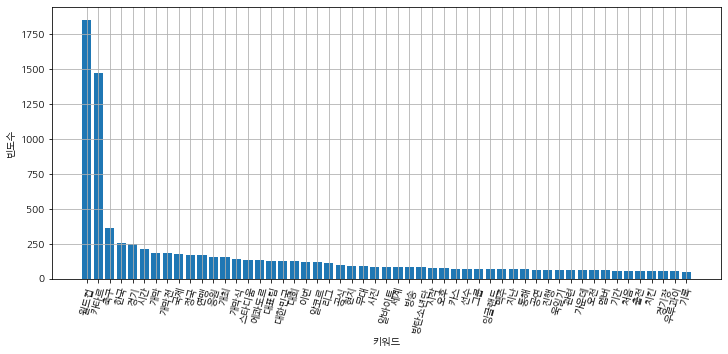

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

### 워드클라우드

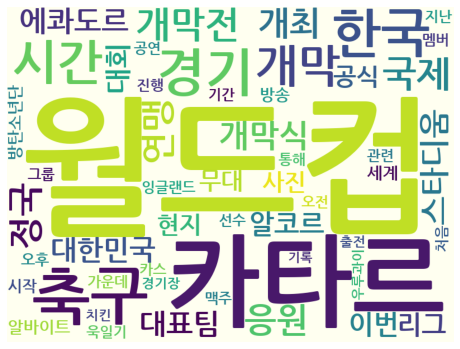

In [ ]:
wc = WordCloud(path, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
cloud.to_file(inputFileName + '_cloud.jpg')